<a href="https://colab.research.google.com/github/yeswanth464/Zeotap/blob/main/YeswanthReddy_Yerraguntla_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

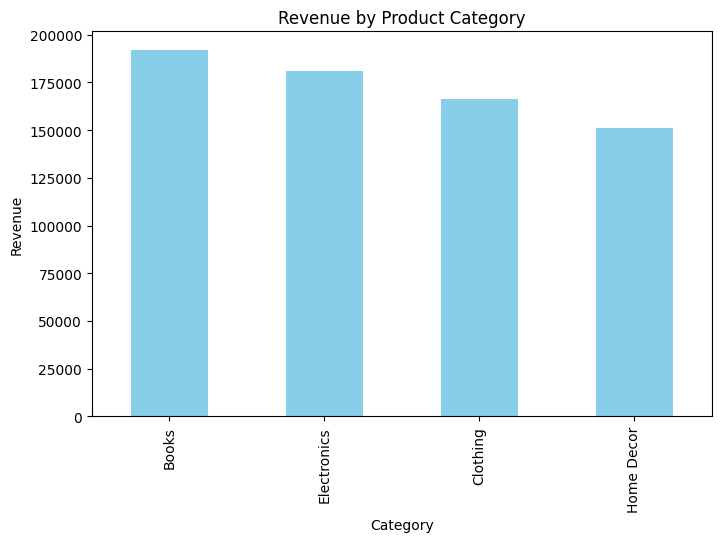

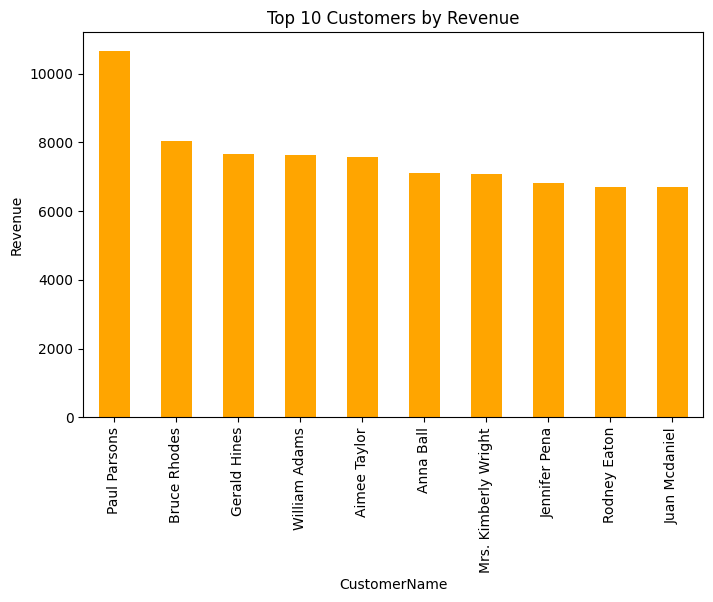

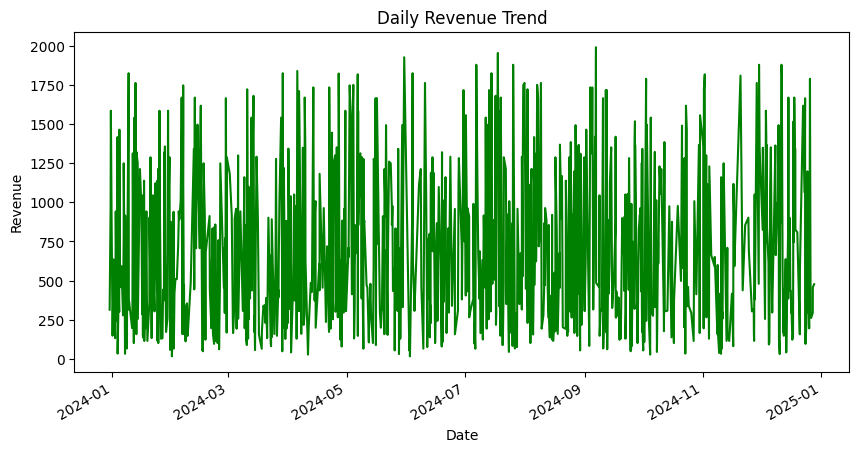

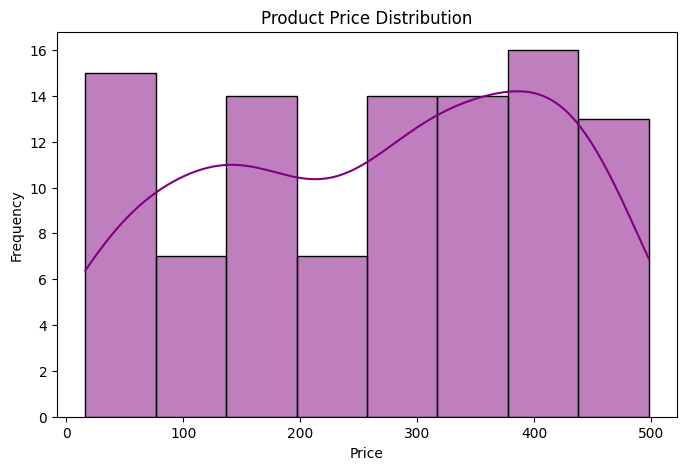

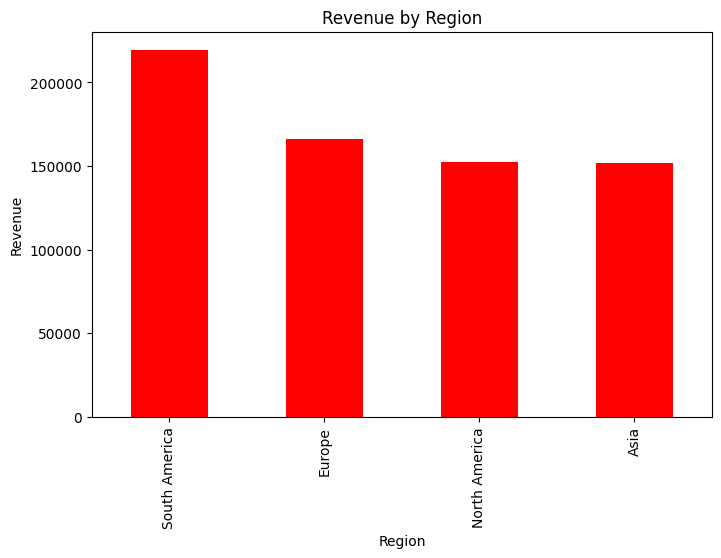

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

transactions = transactions.merge(products, on="ProductID", how="left")
merged_data = transactions.merge(customers, on="CustomerID", how="left")

merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])

category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_revenue.plot(kind="bar", color="skyblue", title="Revenue by Product Category")
plt.ylabel("Revenue")
plt.show()

top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
top_customers.plot(kind="bar", color="orange", title="Top 10 Customers by Revenue")
plt.ylabel("Revenue")
plt.show()

daily_revenue = merged_data.groupby("TransactionDate")["TotalValue"].sum()
plt.figure(figsize=(10, 5))
daily_revenue.plot(color="green", title="Daily Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(products["Price"], kde=True, color="purple")
plt.title("Product Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

region_revenue = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_revenue.plot(kind="bar", color="red", title="Revenue by Region")
plt.ylabel("Revenue")
plt.show()

